## Parsing Dates
Help Python recognize dates as composed of day, month, and year.

 If these are dates doesn't mean that Python knows that they're dates.

In [2]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('./catalog.csv')
data.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [7]:
data["date"].head()


0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

##### Date column is not of type date 

In [9]:
data["date"].head().dtype

dtype('O')

#### Convert to datetime object

#### "parsing dates" because we're taking in a string and identifying its component parts.

Most common :
  - %d  =>  day
  - %m =>  month
  - %y => year(2 digit)  
  - %Y => year(four digit)
- for more formats : https://strftime.org/

In [13]:
# we will add new column after parsing 
data['parsed_date'] = pd.to_datetime(data['date'], format="%m/%d/%y")
data['parsed_date'] .head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: parsed_date, dtype: datetime64[ns]

#### Now our column is of type datetime

### Let's get each part of the date in separate column (day , month , year)

In [16]:
day_of_month = data['parsed_date'].dt.day
day_of_month.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: parsed_date, dtype: float64

#### Double check that month column got correct values between 1 and 31

C:\Users\Mega\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='parsed_date'>

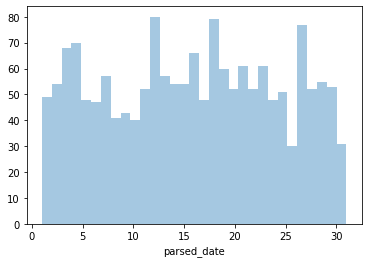

In [18]:
import seaborn as sns
day_of_month_landslides = day_of_month.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)


### make sense , We are done !